# Importing Data

### Merging 12 months of sales data into a single dataframe

In [6]:
import pandas as pd
import numpy as np
import glob
import os
path = r'D:\csv'
all_files = glob.glob('./Sales_Data' + "/*.csv")
df = pd.concat(map(pd.read_csv, all_files))
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


## Clean Data

### 1. Drop NA values

In [67]:
df[df.isna().any(axis=1)]
df = df.dropna(how = 'all')

### 3. Convert columns to correct type

In [44]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']) # make int
df['Price Each'] = pd.to_numeric(df['Price Each']) # make float

### 4. Drop insignificant rows (values the same as the field names)

In [43]:
df.head(256) # Look at row 254 how the values are the same as the Field names

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
251,295899,USB-C Charging Cable,1.0,11.95,12/13/19 16:44,"722 Spruce St, Seattle, WA 98101"
252,295900,AA Batteries (4-pack),1.0,3.84,12/27/19 18:56,"283 Washington St, Boston, MA 02215"
253,295901,20in Monitor,1.0,109.99,12/05/19 20:02,"67 12th St, San Francisco, CA 94016"
255,295902,AA Batteries (4-pack),2.0,3.84,12/26/19 21:54,"160 Maple St, Austin, TX 73301"


In [42]:
df = df[df['Quantity Ordered'] != 'Quantity Ordered']

## Augment data with more columns

### 1. Add month column

In [69]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df

/var/folders/2d/m83w00nd5gj01hnscst9zbsh0000gn/T/ipykernel_95673/335335608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Order Date'].str[0:2]
/var/folders/2d/m83w00nd5gj01hnscst9zbsh0000gn/T/ipykernel_95673/335335608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales],Sales,Month
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,1700.00,12
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,600.00,12
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,11.95,12
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,149.99,12
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,11.95,12
...,...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1.0,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",2.99,2.99,6
13618,222906,27in FHD Monitor,1.0,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",149.99,149.99,6
13619,222907,USB-C Charging Cable,1.0,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",11.95,11.95,6
13620,222908,USB-C Charging Cable,1.0,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",11.95,11.95,6


### 2. Add a sales column

In [50]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

### 3. Add a city column

#### x represents cell value in 'Purchase Address'; x.split(',') means split the cell value up into sections where the commas separate them; [1] is the index number that we want to grab

In [100]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: get_city(x) + ', ' + get_state(x))
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,12,"New York City, NY"
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,12,"New York City, NY"
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,12,"New York City, NY"
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,12,"San Francisco, CA"
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,12,"Atlanta, GA"
...,...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1.0,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",2.99,6,"Boston, MA"
13618,222906,27in FHD Monitor,1.0,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",149.99,6,"New York City, NY"
13619,222907,USB-C Charging Cable,1.0,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",11.95,6,"San Francisco, CA"
13620,222908,USB-C Charging Cable,1.0,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",11.95,6,"San Francisco, CA"


## Question 1: What was the best month for sales? How much was earned that month?

### 1. Group by Month

In [73]:
results = df.groupby('Month').sum()

### 2. Plot data

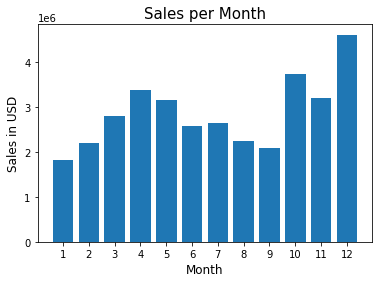

In [140]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel('Month', size = 12)
plt.ylabel('Sales in USD', size = 12)
plt.title('Sales per Month', size = 15)
plt.show()

#### December has the most sales possibly because of Christmas time and more gifts are being bought

##  Question 2: What city had the highest number of sales?

In [102]:
cityresults = df.groupby('City').sum('Sales')
cityresults

,Quantity Ordered,Price Each,Sales,Month
City,,,,
"Atlanta, GA",16600.0,2779148.22,2794738.60,104782
"Austin, TX",11149.0,1809449.67,1819145.86,69811
"Boston, MA",22526.0,3636309.79,3660542.03,141094
"Dallas, TX",16729.0,2752477.82,2767825.40,104614
"Los Angeles, CA",33285.0,5421402.34,5452534.92,208299
"New York City, NY",27925.0,4634242.06,4663176.71,175701
"Portland, ME",2750.0,447189.25,449758.27,17144
"Portland, OR",11298.0,1860390.26,1870561.39,70606
"San Francisco, CA",50230.0,8211085.91,8261828.08,315462


Text(0.5, 1.0, 'Sales per City')

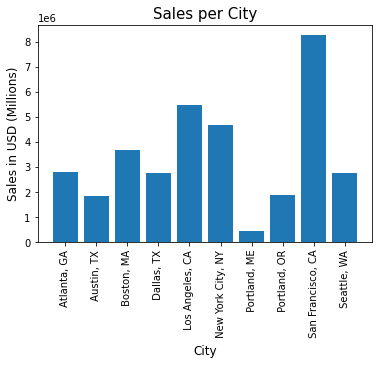

In [138]:
import matplotlib.pyplot as plt

cities = [city for city, df2 in df.groupby('City')]

plt.bar(cities, cityresults['Sales'])
plt.xticks(cities, rotation = 'vertical')
plt.xlabel('City', size = 12)
plt.ylabel('Sales in USD (Millions)', size = 12)
plt.title('Sales per City', size = 15)

## Question: What time should we display advertisements to maximize likelihood of cutomer's buying product?

### Add hour column to data

In [117]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12,"New York City, NY",0,1
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12,"New York City, NY",7,3
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12,"New York City, NY",18,21
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12,"San Francisco, CA",15,13
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,"Atlanta, GA",12,38
...,...,...,...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1.0,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",2.99,6,"Boston, MA",19,2
13618,222906,27in FHD Monitor,1.0,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",149.99,6,"New York City, NY",19,29
13619,222907,USB-C Charging Cable,1.0,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",11.95,6,"San Francisco, CA",18,57
13620,222908,USB-C Charging Cable,1.0,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",11.95,6,"San Francisco, CA",18,35


### Plot data

In [118]:
resulthour = df.groupby('Hour').sum('Sales')

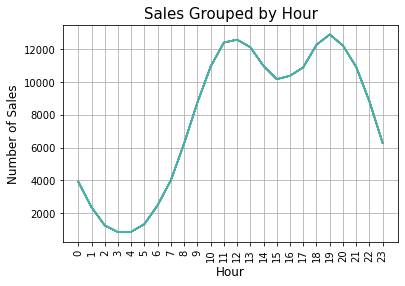

In [142]:
hours = [hour for hour, df2 in df.groupby('Hour')]

plt.plot(hours, df.groupby(['Hour']).count())
plt.xticks(hours, rotation = 'vertical')
plt.xlabel('Hour', size = 12)
plt.ylabel('Number of Sales', size = 12)
plt.title('Sales Grouped by Hour', size = 15)
plt.grid()

#### Should show advertisements around 11am and 7pm

## Question: What products would be the most often sold together?